In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
import seaborn as sns
import math

In [2]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Importing the data so as to use the same data with every run
X_train = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/X_train.xlsx")
y_train = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/y_train.xlsx")
X_test = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/X_test.xlsx")
y_test = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/y_test.xlsx")

In [4]:
X_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
X_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
y_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
y_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [5]:
X_test.set_index('Index', inplace=True)
X_train.set_index('Index', inplace=True)
y_test.set_index('Index', inplace=True)
y_train.set_index('Index', inplace=True)

In [6]:
y_train = y_train.TARGET_ABUSER
y_test = y_test.TARGET_ABUSER

In [7]:
X_test.shape

(10078, 47)

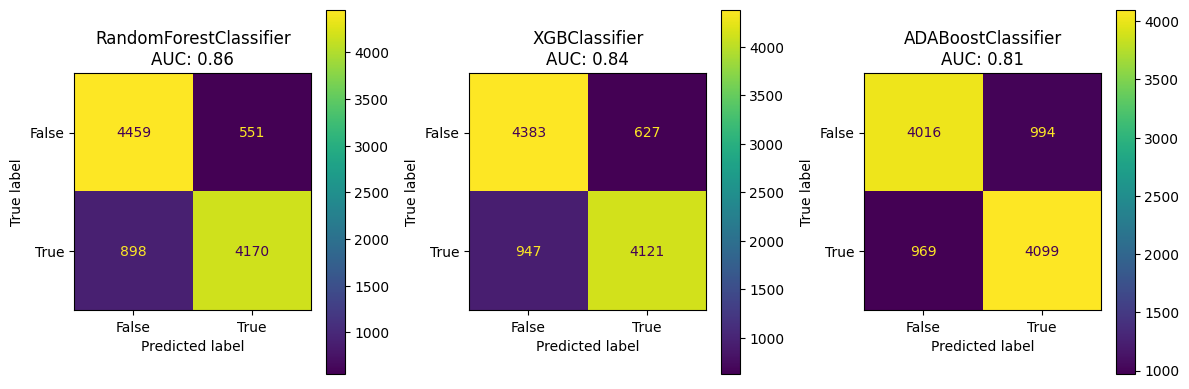

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Assuming X_train, X_test, y_train, y_test are defined

# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=32)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
clf_report_rf = classification_report(y_test, y_pred_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
clf_report_xgb = classification_report(y_test, y_pred_xgb)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ADABoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
clf_report_ada = classification_report(y_test, y_pred_ada)
auc_ada = metrics.roc_auc_score(y_test, y_pred_ada)
confusion_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# RandomForestClassifier confusion matrix
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=[False, True])
cm_display_rf.plot(ax=axes[0], values_format='d', cmap='viridis', xticks_rotation='horizontal')
axes[0].set_title('RandomForestClassifier\n' + f"AUC: {auc_rf:.2f}")

# XGBClassifier confusion matrix
cm_display_xgb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb, display_labels=[False, True])
cm_display_xgb.plot(ax=axes[1], values_format='d', cmap='viridis', xticks_rotation='horizontal')
axes[1].set_title('XGBClassifier\n' + f"AUC: {auc_xgb:.2f}")

# ADABoostClassifier confusion matrix
cm_display_ada = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ada, display_labels=[False, True])
cm_display_ada.plot(ax=axes[2], values_format='d', cmap='viridis', xticks_rotation='horizontal')
axes[2].set_title('ADABoostClassifier\n' + f"AUC: {auc_ada:.2f}")

plt.tight_layout()
plt.show()


In [10]:
# Predict probabilities for each class on the test set
probabilitiesrf = rf.predict_proba(X_test)
# Converting the probabilities into a dataframe
df_prob_rf = pd.DataFrame(probabilitiesrf)
# Adduing index column of test data to compare later
df_prob_rf['index_column'] = X_test.index
# Creating a dataframe to store all the predicted values
df_pred_rf = pd.DataFrame(y_pred_rf)
# Creating a dataframe to store all the actual values
df_actual_rf = pd.DataFrame(y_test)
#Creating a new dataframe to store the results
df_results_rf = pd.DataFrame()
df_results_rf['index_column'] = df_actual_rf.index
df_results_rf['Actual'] = df_actual_rf.values
df_results_rf['Predicted'] = df_pred_rf.values
# Merging the actual and predicted y values with the probability of each prediction
df_merged_rf = pd.merge(df_results_rf, df_prob_rf, on='index_column')
#Renaming the columns for better understanding
df_merged_rf.rename(columns={0: 'Prob_0'}, inplace=True)
df_merged_rf.rename(columns={1: 'Prob_1'}, inplace=True)
# Dividing the dataframes based on TP, FP, TN and FN
df_tp_rf = df_merged_rf[(df_merged_rf['Actual'] == 1) & (df_merged_rf['Predicted'] == 1)]
df_tn_rf = df_merged_rf[(df_merged_rf['Actual'] == 0) & (df_merged_rf['Predicted'] == 0)]
df_fp_rf = df_merged_rf[(df_merged_rf['Actual'] == 0) & (df_merged_rf['Predicted'] == 1)]
df_fn_rf = df_merged_rf[(df_merged_rf['Actual'] == 1) & (df_merged_rf['Predicted'] == 0)]

In [11]:
# Predict probabilities for each class on the test set
probabilitiesxgb = xgb.predict_proba(X_test)
# Converting the probabilities into a dataframe
df_prob_xgb = pd.DataFrame(probabilitiesxgb)
# Adding index column of test data to compare later
df_prob_xgb['index_column'] = X_test.index
# Creating a dataframe to store all the predicted values
df_pred_xgb = pd.DataFrame(y_pred_xgb)
# Creating a dataframe to store all the actual values
df_actual_xgb = pd.DataFrame(y_test)
# Creating a new dataframe to store the results
df_results_xgb = pd.DataFrame()
df_results_xgb['index_column'] = df_actual_xgb.index
df_results_xgb['Actual'] = df_actual_xgb.values
df_results_xgb['Predicted'] = df_pred_xgb.values
# Merging the actual and predicted y values with the probability of each prediction
df_merged_xgb = pd.merge(df_results_xgb, df_prob_xgb, on='index_column')
# Renaming the columns for better understanding
df_merged_xgb.rename(columns={0: 'Prob_0'}, inplace=True)
df_merged_xgb.rename(columns={1: 'Prob_1'}, inplace=True)
# Dividing the dataframes based on TP, FP, TN, and FN
df_tp_xgb = df_merged_xgb[(df_merged_xgb['Actual'] == 1) & (df_merged_xgb['Predicted'] == 1)]
df_tn_xgb = df_merged_xgb[(df_merged_xgb['Actual'] == 0) & (df_merged_xgb['Predicted'] == 0)]
df_fp_xgb = df_merged_xgb[(df_merged_xgb['Actual'] == 0) & (df_merged_xgb['Predicted'] == 1)]
df_fn_xgb = df_merged_xgb[(df_merged_xgb['Actual'] == 1) & (df_merged_xgb['Predicted'] == 0)]


In [12]:
# Predict probabilities for each class on the test set
probabilities_ada = ada.predict_proba(X_test)
# Converting the probabilities into a dataframe
df_prob_ada = pd.DataFrame(probabilities_ada)
# Adding index column of test data to compare later
df_prob_ada['index_column'] = X_test.index
# Creating a dataframe to store all the predicted values
df_pred_ada = pd.DataFrame(y_pred_ada)
# Creating a dataframe to store all the actual values
df_actual_ada = pd.DataFrame(y_test)
# Creating a new dataframe to store the results
df_results_ada = pd.DataFrame()
df_results_ada['index_column'] = df_actual_ada.index
df_results_ada['Actual'] = df_actual_ada.values
df_results_ada['Predicted'] = df_pred_ada.values
# Merging the actual and predicted y values with the probability of each prediction
df_merged_ada = pd.merge(df_results_ada, df_prob_ada, on='index_column')
# Renaming the columns for better understanding
df_merged_ada.rename(columns={0: 'Prob_0'}, inplace=True)
df_merged_ada.rename(columns={1: 'Prob_1'}, inplace=True)
# Dividing the dataframes based on TP, FP, TN, and FN
df_tp_ada = df_merged_ada[(df_merged_ada['Actual'] == 1) & (df_merged_ada['Predicted'] == 1)]
df_tn_ada = df_merged_ada[(df_merged_ada['Actual'] == 0) & (df_merged_ada['Predicted'] == 0)]
df_fp_ada = df_merged_ada[(df_merged_ada['Actual'] == 0) & (df_merged_ada['Predicted'] == 1)]
df_fn_ada = df_merged_ada[(df_merged_ada['Actual'] == 1) & (df_merged_ada['Predicted'] == 0)]


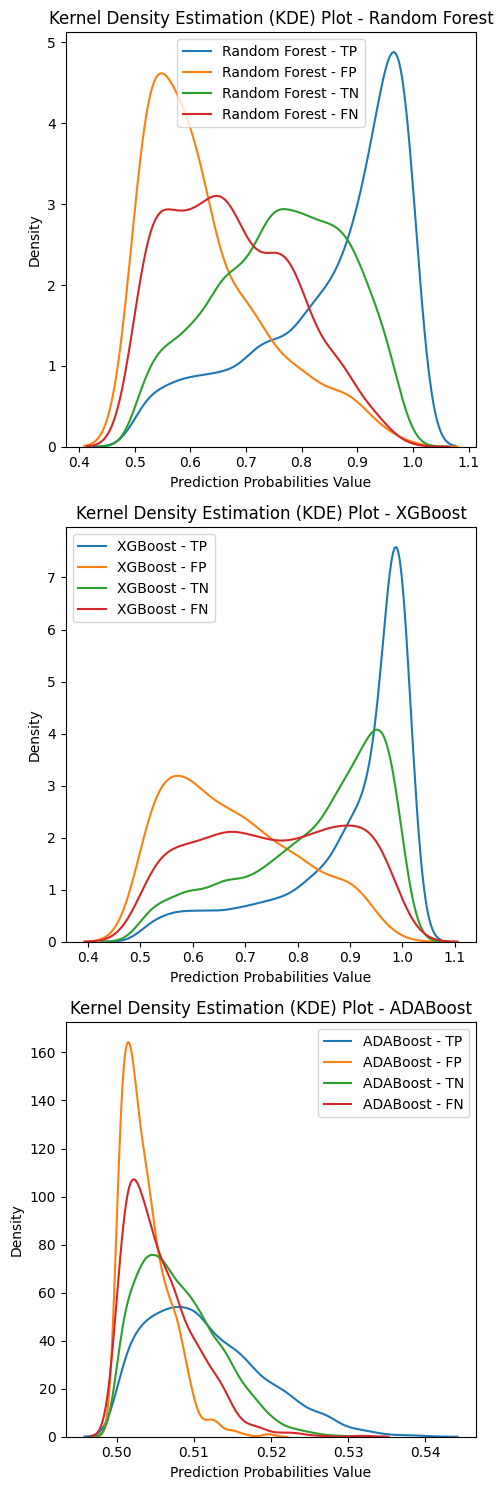

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the layout to fit all three subplots
plt.figure(figsize=(5, 15))

# KDE plot for Random Forest
plt.subplot(3, 1, 1)
sns.kdeplot(data=df_tp_rf['Prob_1'], label='Random Forest - TP')
sns.kdeplot(data=df_fp_rf['Prob_1'], label='Random Forest - FP')
sns.kdeplot(data=df_tn_rf['Prob_0'], label='Random Forest - TN')
sns.kdeplot(data=df_fn_rf['Prob_0'], label='Random Forest - FN')
plt.title('Kernel Density Estimation (KDE) Plot - Random Forest')
plt.xlabel('Prediction Probabilities Value')
plt.ylabel('Density')
plt.legend()

# KDE plot for XGBoost
plt.subplot(3, 1, 2)
sns.kdeplot(data=df_tp_xgb['Prob_1'], label='XGBoost - TP')
sns.kdeplot(data=df_fp_xgb['Prob_1'], label='XGBoost - FP')
sns.kdeplot(data=df_tn_xgb['Prob_0'], label='XGBoost - TN')
sns.kdeplot(data=df_fn_xgb['Prob_0'], label='XGBoost - FN')
plt.title('Kernel Density Estimation (KDE) Plot - XGBoost')
plt.xlabel('Prediction Probabilities Value')
plt.ylabel('Density')
plt.legend()

# KDE plot for ADABoost
plt.subplot(3, 1, 3)
sns.kdeplot(data=df_tp_ada['Prob_1'], label='ADABoost - TP')
sns.kdeplot(data=df_fp_ada['Prob_1'], label='ADABoost - FP')
sns.kdeplot(data=df_tn_ada['Prob_0'], label='ADABoost - TN')
sns.kdeplot(data=df_fn_ada['Prob_0'], label='ADABoost - FN')
plt.title('Kernel Density Estimation (KDE) Plot - ADABoost')
plt.xlabel('Prediction Probabilities Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
import pandas as pd

# Calculate the required metrics for RF
total_train_rf = len(y_train)
total_test_rf = len(y_test)
abusers_test_rf = sum(y_test)
non_abusers_test_rf = len(y_test) - abusers_test_rf
accuracy_rf = rf.score(X_test, y_test)
y_pred_rf = rf.predict(X_test)
tn_rf, fp_rf, fn_rf, tp_rf = metrics.confusion_matrix(y_test, y_pred_rf).ravel()
correct_classified_rf = tp_rf + tn_rf
misclassified_rf = total_test_rf - correct_classified_rf

# Calculate TP and FP counts in specified probability ranges for RF
tp_range_50_60_rf = df_tp_rf[(df_tp_rf['Prob_1'] >= 0.50) & (df_tp_rf['Prob_1'] < 0.60)].shape[0]
fp_range_50_60_rf = df_fp_rf[(df_fp_rf['Prob_1'] >= 0.50) & (df_fp_rf['Prob_1'] < 0.60)].shape[0]
fp_range_90_100_rf = df_fp_rf[(df_fp_rf['Prob_1'] >= 0.90) & (df_fp_rf['Prob_1'] <= 1.00)].shape[0]
tp_range_50_51_rf = df_tp_rf[(df_tp_rf['Prob_1'] >= 0.50) & (df_tp_rf['Prob_1'] < 0.51)].shape[0]
fp_range_50_51_rf = df_fp_rf[(df_fp_rf['Prob_1'] >= 0.50) & (df_fp_rf['Prob_1'] < 0.51)].shape[0]

# Create a DataFrame for RF metrics
data_rf = {
    'Model': ['Random Forest'],
    'Training Data': [total_train_rf],
    'Testing Data': [total_test_rf],
    'No. of Abusers in Test Data': [abusers_test_rf],
    'No. of Non-Abusers in Test Data': [non_abusers_test_rf],
    'Accuracy': [accuracy_rf],
    'True Positives (TP)': [tp_rf],
    'False Positives (FP)': [fp_rf],
    'True Negatives (TN)': [tn_rf],
    'False Negatives (FN)': [fn_rf],
    'Correctly Classified Records': [correct_classified_rf],
    'Misclassified Records': [misclassified_rf],
    'TP in 0.50-0.60 Probability Range': [tp_range_50_60_rf],
    'FP in 0.50-0.60 Probability Range': [fp_range_50_60_rf],
    'FP in 0.90-1.00 Probability Range': [fp_range_90_100_rf],
    'TP in 0.50-0.51 Probability Range': [tp_range_50_51_rf],
    'FP in 0.50-0.51 Probability Range': [fp_range_50_51_rf]
}

df_rf = pd.DataFrame(data_rf)

# Calculate the required metrics for XGB
total_train_xgb = len(y_train)
total_test_xgb = len(y_test)
abusers_test_xgb = sum(y_test)
non_abusers_test_xgb = len(y_test) - abusers_test_xgb
accuracy_xgb = xgb.score(X_test, y_test)
y_pred_xgb = xgb.predict(X_test)
tn_xgb, fp_xgb, fn_xgb, tp_xgb = metrics.confusion_matrix(y_test, y_pred_xgb).ravel()
correct_classified_xgb = tp_xgb + tn_xgb
misclassified_xgb = total_test_xgb - correct_classified_xgb

# Calculate TP and FP counts in specified probability ranges for XGB
tp_range_50_60_xgb = df_tp_xgb[(df_tp_xgb['Prob_1'] >= 0.50) & (df_tp_xgb['Prob_1'] < 0.60)].shape[0]
fp_range_50_60_xgb = df_fp_xgb[(df_fp_xgb['Prob_1'] >= 0.50) & (df_fp_xgb['Prob_1'] < 0.60)].shape[0]
fp_range_90_100_xgb = df_fp_xgb[(df_fp_xgb['Prob_1'] >= 0.90) & (df_fp_xgb['Prob_1'] <= 1.00)].shape[0]
tp_range_50_51_xgb = df_tp_xgb[(df_tp_xgb['Prob_1'] >= 0.50) & (df_tp_xgb['Prob_1'] < 0.51)].shape[0]
fp_range_50_51_xgb = df_fp_xgb[(df_fp_xgb['Prob_1'] >= 0.50) & (df_fp_xgb['Prob_1'] < 0.51)].shape[0]

# Create a DataFrame for XGB metrics
data_xgb = {
    'Model': ['XGBoost'],
    'Training Data': [total_train_xgb],
    'Testing Data': [total_test_xgb],
    'No. of Abusers in Test Data': [abusers_test_xgb],
    'No. of Non-Abusers in Test Data': [non_abusers_test_xgb],
    'Accuracy': [accuracy_xgb],
    'True Positives (TP)': [tp_xgb],
    'False Positives (FP)': [fp_xgb],
    'True Negatives (TN)': [tn_xgb],
    'False Negatives (FN)': [fn_xgb],
    'Correctly Classified Records': [correct_classified_xgb],
    'Misclassified Records': [misclassified_xgb],
    'TP in 0.50-0.60 Probability Range': [tp_range_50_60_xgb],
    'FP in 0.50-0.60 Probability Range': [fp_range_50_60_xgb],
    'FP in 0.90-1.00 Probability Range': [fp_range_90_100_xgb],
    'TP in 0.50-0.51 Probability Range': [tp_range_50_51_xgb],
    'FP in 0.50-0.51 Probability Range': [fp_range_50_51_xgb]
}

df_xgb = pd.DataFrame(data_xgb)

# Concatenate both DataFrames to create the final table
df_table = pd.concat([df_rf, df_xgb], ignore_index=True)

#print(df_table.transpose())


In [30]:
styled_df_table = df_table.style \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [
            ('text-align', 'center'),
            ('font-size', '12px')
        ]
    }, {
        'selector': 'td',
        'props': [
            ('text-align', 'center'),
            ('font-size', '12px')
        ]
    }])

styled_df_table

,Model,Training Data,Testing Data,No. of Abusers in Test Data,No. of Non-Abusers in Test Data,Accuracy,True Positives (TP),False Positives (FP),True Negatives (TN),False Negatives (FN),Correctly Classified Records,Misclassified Records,TP in 0.50-0.60 Probability Range,FP in 0.50-0.60 Probability Range,FP in 0.90-1.00 Probability Range,TP in 0.50-0.51 Probability Range,FP in 0.50-0.51 Probability Range
0,Random Forest,40308,10078,5068,5010,0.856221,4170,551,4459,898,8629,1449,306,273,14,23,29
1,XGBoost,40308,10078,5068,5010,0.843818,4121,627,4383,947,8504,1574,208,216,40,8,22


In [ ]:
df_table.transpose()

,0,1
Model,Random Forest,XGBoost
Training Data,40308,40308
Testing Data,10078,10078
No. of Abusers in Test Data,5068,5068
No. of Non-Abusers in Test Data,5010,5010
Accuracy,0.856,0.844
True Positives (TP),4170,4121
False Positives (FP),551,627
True Negatives (TN),4459,4383
False Negatives (FN),898,947


No charts were generated by quickchart


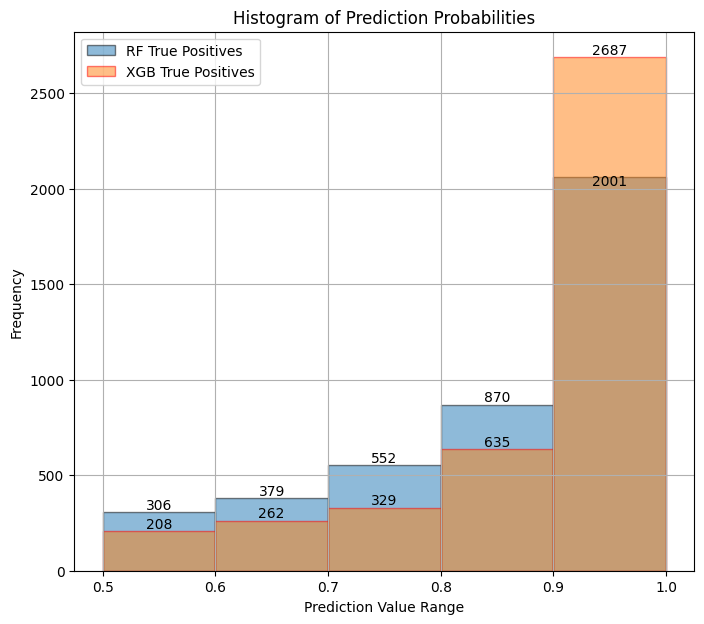

In [ ]:
# Define the bins for all classes
bins = [0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
plt.figure(figsize=(8, 7))
# Plot the histograms for all classes
plt.hist(df_tp_rf['Prob_1'], bins=bins, edgecolor='black', alpha=0.5, label='RF True Positives')
plt.hist(df_tp_xgb['Prob_1'], bins=bins, edgecolor='red', alpha=0.5, label='XGB True Positives')

plt.xlabel('Prediction Value Range')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Probabilities')
plt.xticks(bins)

# Add frequency values on top of each bar for True Positives
for i in range(len(bins) - 1):
    count_tp_rf = df_tp_rf[(df_tp_rf['Prob_1'] >= bins[i]) & (df_tp_rf['Prob_1'] < bins[i+1])]['Prob_1'].count()
    plt.text((bins[i] + bins[i+1]) / 2, count_tp_rf, str(count_tp_rf), ha='center', va='bottom')

# Add frequency values on top of each bar for True Positives
for i in range(len(bins) - 1):
    count_tp_xgb = df_tp_xgb[(df_tp_xgb['Prob_1'] >= bins[i]) & (df_tp_xgb['Prob_1'] < bins[i+1])]['Prob_1'].count()
    plt.text((bins[i] + bins[i+1]) / 2, count_tp_xgb, str(count_tp_xgb), ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()

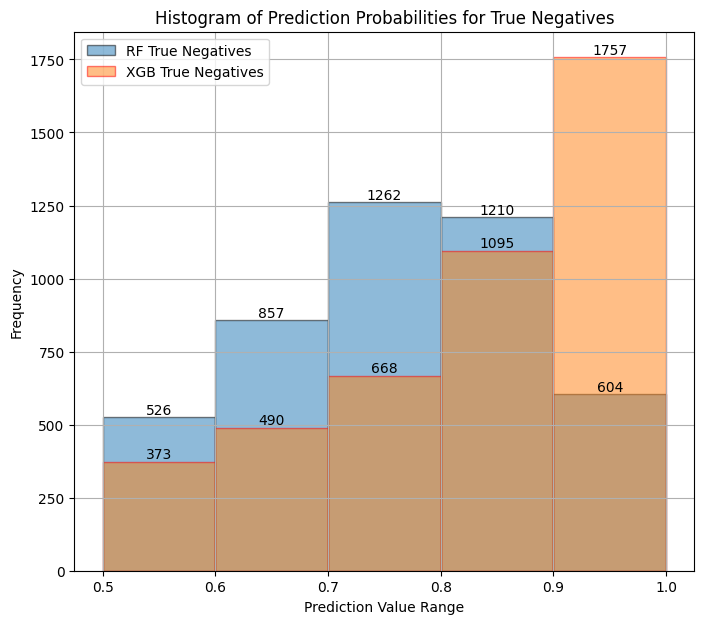

In [ ]:
# Define the bins for all classes
bins = [0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
plt.figure(figsize=(8, 7))
# Plot the histograms for all classes
plt.hist(df_tn_rf['Prob_0'], bins=bins, edgecolor='black', alpha=0.5, label='RF True Negatives')
plt.hist(df_tn_xgb['Prob_0'], bins=bins, edgecolor='red', alpha=0.5, label='XGB True Negatives')

plt.xlabel('Prediction Value Range')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Probabilities for True Negatives')
plt.xticks(bins)

# Add frequency values on top of each bar for True Negatives in Random Forest
for i in range(len(bins) - 1):
    count_tn_rf = df_tn_rf[(df_tn_rf['Prob_0'] >= bins[i]) & (df_tn_rf['Prob_0'] < bins[i+1])]['Prob_0'].count()
    plt.text((bins[i] + bins[i+1]) / 2, count_tn_rf, str(count_tn_rf), ha='center', va='bottom')

# Add frequency values on top of each bar for True Negatives in XGBoost
for i in range(len(bins) - 1):
    count_tn_xgb = df_tn_xgb[(df_tn_xgb['Prob_0'] >= bins[i]) & (df_tn_xgb['Prob_0'] < bins[i+1])]['Prob_0'].count()
    plt.text((bins[i] + bins[i+1]) / 2, count_tn_xgb, str(count_tn_xgb), ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()


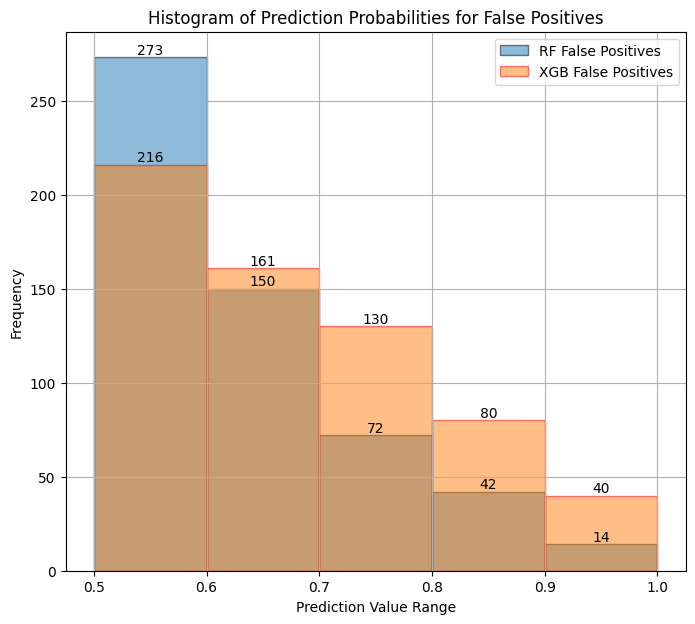

In [ ]:
# Define the bins for all classes
bins = [0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
plt.figure(figsize=(8, 7))
# Plot the histograms for all classes
plt.hist(df_fp_rf['Prob_1'], bins=bins, edgecolor='black', alpha=0.5, label='RF False Positives')
plt.hist(df_fp_xgb['Prob_1'], bins=bins, edgecolor='red', alpha=0.5, label='XGB False Positives')

plt.xlabel('Prediction Value Range')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Probabilities for False Positives')
plt.xticks(bins)

# Add frequency values on top of each bar for False Positives in Random Forest
for i in range(len(bins) - 1):
    count_fp_rf = df_fp_rf[(df_fp_rf['Prob_1'] >= bins[i]) & (df_fp_rf['Prob_1'] < bins[i+1])]['Prob_1'].count()
    plt.text((bins[i] + bins[i+1]) / 2, count_fp_rf, str(count_fp_rf), ha='center', va='bottom')

# Add frequency values on top of each bar for False Positives in XGBoost
for i in range(len(bins) - 1):
    count_fp_xgb = df_fp_xgb[(df_fp_xgb['Prob_1'] >= bins[i]) & (df_fp_xgb['Prob_1'] < bins[i+1])]['Prob_1'].count()
    plt.text((bins[i] + bins[i+1]) / 2, count_fp_xgb, str(count_fp_xgb), ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()


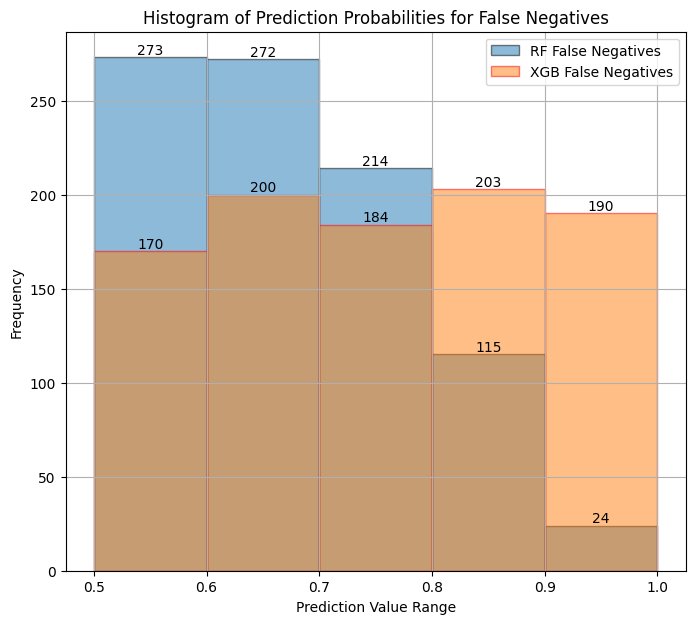

In [ ]:
# Define the bins for all classes
bins = [0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
plt.figure(figsize=(8, 7))
# Plot the histograms for all classes
plt.hist(df_fn_rf['Prob_0'], bins=bins, edgecolor='black', alpha=0.5, label='RF False Negatives')
plt.hist(df_fn_xgb['Prob_0'], bins=bins, edgecolor='red', alpha=0.5, label='XGB False Negatives')

plt.xlabel('Prediction Value Range')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Probabilities for False Negatives')
plt.xticks(bins)

# Add frequency values on top of each bar for False Negatives in Random Forest
for i in range(len(bins) - 1):
    count_fn_rf = df_fn_rf[(df_fn_rf['Prob_0'] >= bins[i]) & (df_fn_rf['Prob_0'] < bins[i+1])]['Prob_0'].count()
    plt.text((bins[i] + bins[i+1]) / 2, count_fn_rf, str(count_fn_rf), ha='center', va='bottom')

# Add frequency values on top of each bar for False Negatives in XGBoost
for i in range(len(bins) - 1):
    count_fn_xgb = df_fn_xgb[(df_fn_xgb['Prob_0'] >= bins[i]) & (df_fn_xgb['Prob_0'] < bins[i+1])]['Prob_0'].count()
    plt.text((bins[i] + bins[i+1]) / 2, count_fn_xgb, str(count_fn_xgb), ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()

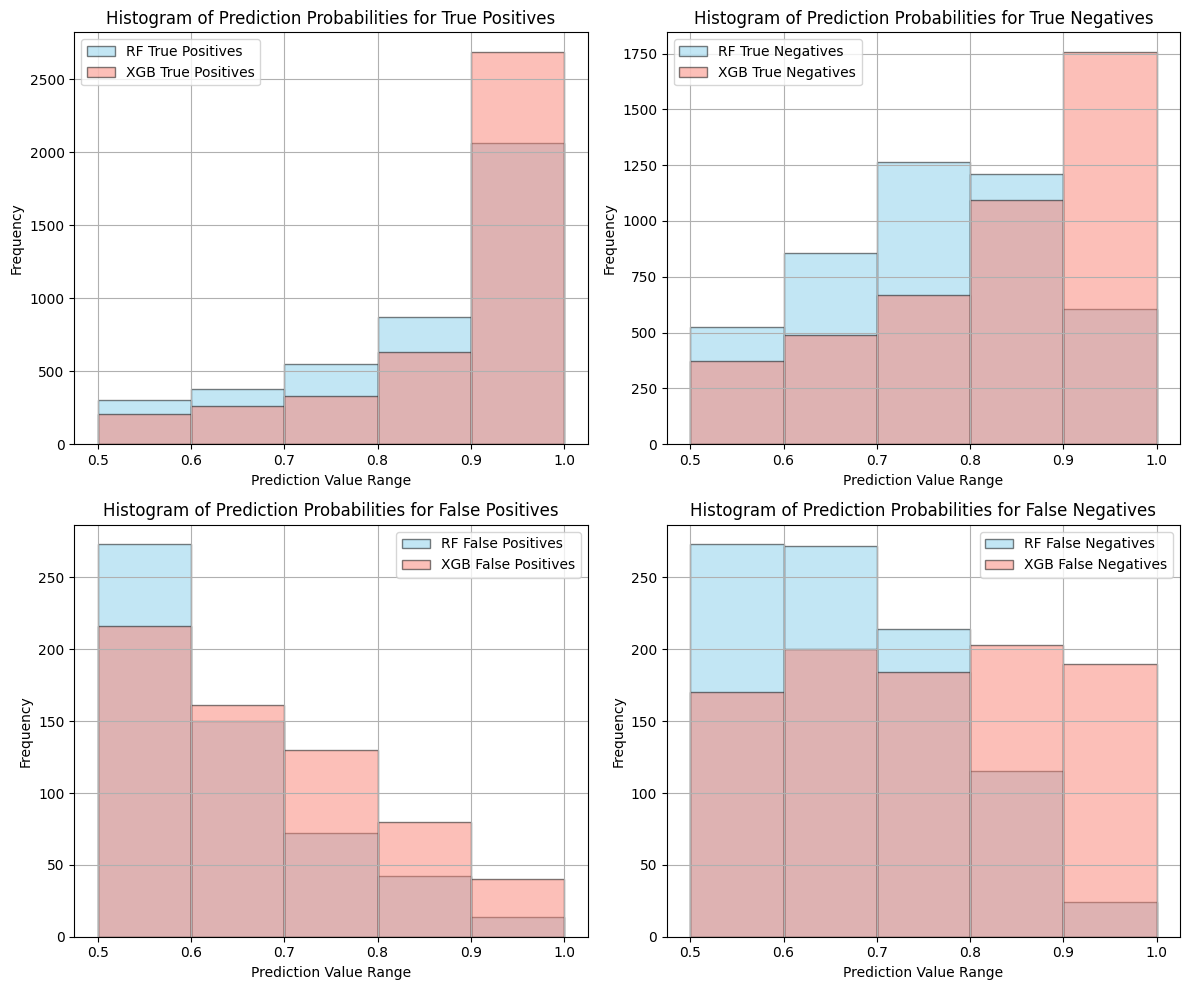

In [ ]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the histograms for True Positives in Random Forest and XGBoost
axs[0, 0].hist(df_tp_rf['Prob_1'], bins=bins, edgecolor='black', alpha=0.5, color='skyblue', label='RF True Positives')
axs[0, 0].hist(df_tp_xgb['Prob_1'], bins=bins, edgecolor='black', alpha=0.5, color='salmon', label='XGB True Positives')
axs[0, 0].set_xlabel('Prediction Value Range')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Prediction Probabilities for True Positives')
axs[0, 0].set_xticks(bins)
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot the histograms for True Negatives in Random Forest and XGBoost
axs[0, 1].hist(df_tn_rf['Prob_0'], bins=bins, edgecolor='black', alpha=0.5, color='skyblue', label='RF True Negatives')
axs[0, 1].hist(df_tn_xgb['Prob_0'], bins=bins, edgecolor='black', alpha=0.5, color='salmon', label='XGB True Negatives')
axs[0, 1].set_xlabel('Prediction Value Range')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Prediction Probabilities for True Negatives')
axs[0, 1].set_xticks(bins)
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot the histograms for False Positives in Random Forest and XGBoost
axs[1, 0].hist(df_fp_rf['Prob_1'], bins=bins, edgecolor='black', alpha=0.5, color='skyblue', label='RF False Positives')
axs[1, 0].hist(df_fp_xgb['Prob_1'], bins=bins, edgecolor='black', alpha=0.5, color='salmon', label='XGB False Positives')
axs[1, 0].set_xlabel('Prediction Value Range')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Prediction Probabilities for False Positives')
axs[1, 0].set_xticks(bins)
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot the histograms for False Negatives in Random Forest and XGBoost
axs[1, 1].hist(df_fn_rf['Prob_0'], bins=bins, edgecolor='black', alpha=0.5, color='skyblue', label='RF False Negatives')
axs[1, 1].hist(df_fn_xgb['Prob_0'], bins=bins, edgecolor='black', alpha=0.5, color='salmon', label='XGB False Negatives')
axs[1, 1].set_xlabel('Prediction Value Range')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Prediction Probabilities for False Negatives')
axs[1, 1].set_xticks(bins)
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


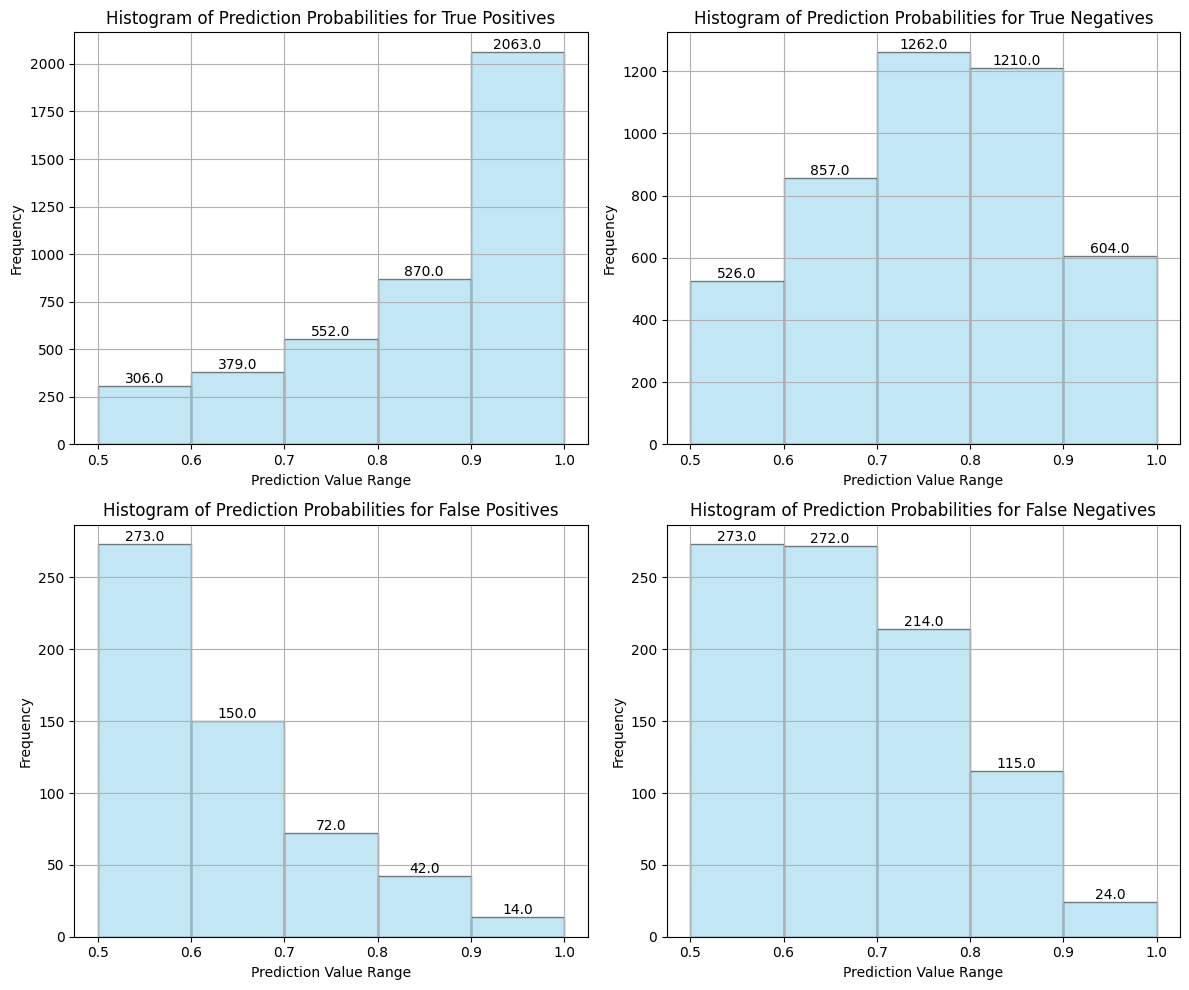

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define a function to add counts on top of bars
def add_counts(ax, bins, counts):
    for count, x in zip(counts, bins):
        ax.text(x, count, str(count), ha='center', va='bottom')

# Plot the histograms for True Positives in Random Forest and XGBoost
counts, bins, patches = axs[0, 0].hist(df_tp_rf['Prob_1'], bins=bins, edgecolor='black', alpha=0.5, color='skyblue', label='RF True Positives')
axs[0, 0].set_xlabel('Prediction Value Range')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Prediction Probabilities for True Positives')
axs[0, 0].set_xticks(bins)
#axs[0, 0].legend()
axs[0, 0].grid(True)
add_counts(axs[0, 0], (bins[:-1] + bins[1:]) / 2, counts)

# Plot the histograms for True Negatives in Random Forest and XGBoost
counts, bins, patches = axs[0, 1].hist(df_tn_rf['Prob_0'], bins=bins, edgecolor='black', alpha=0.5, color='skyblue', label='RF True Negatives')
axs[0, 1].set_xlabel('Prediction Value Range')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Prediction Probabilities for True Negatives')
axs[0, 1].set_xticks(bins)
#axs[0, 1].legend()
axs[0, 1].grid(True)
add_counts(axs[0, 1], (bins[:-1] + bins[1:]) / 2, counts)

# Plot the histograms for False Positives in Random Forest and XGBoost
counts, bins, patches = axs[1, 0].hist(df_fp_rf['Prob_1'], bins=bins, edgecolor='black', alpha=0.5, color='skyblue', label='RF False Positives')
axs[1, 0].set_xlabel('Prediction Value Range')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Prediction Probabilities for False Positives')
axs[1, 0].set_xticks(bins)
#axs[1, 0].legend()
axs[1, 0].grid(True)
add_counts(axs[1, 0], (bins[:-1] + bins[1:]) / 2, counts)

# Plot the histograms for False Negatives in Random Forest and XGBoost
counts, bins, patches = axs[1, 1].hist(df_fn_rf['Prob_0'], bins=bins, edgecolor='black', alpha=0.5, color='skyblue', label='RF False Negatives')
axs[1, 1].set_xlabel('Prediction Value Range')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Prediction Probabilities for False Negatives')
axs[1, 1].set_xticks(bins)
#axs[1, 1].legend()
axs[1, 1].grid(True)
add_counts(axs[1, 1], (bins[:-1] + bins[1:]) / 2, counts)

plt.tight_layout()
plt.show()


Now we will only look at special cases for Random Forest Model

1. 0.50-0.60 probability of TP
2. 0.50-0.60 probability of FP
3. 0.90-1.00 probability of FP



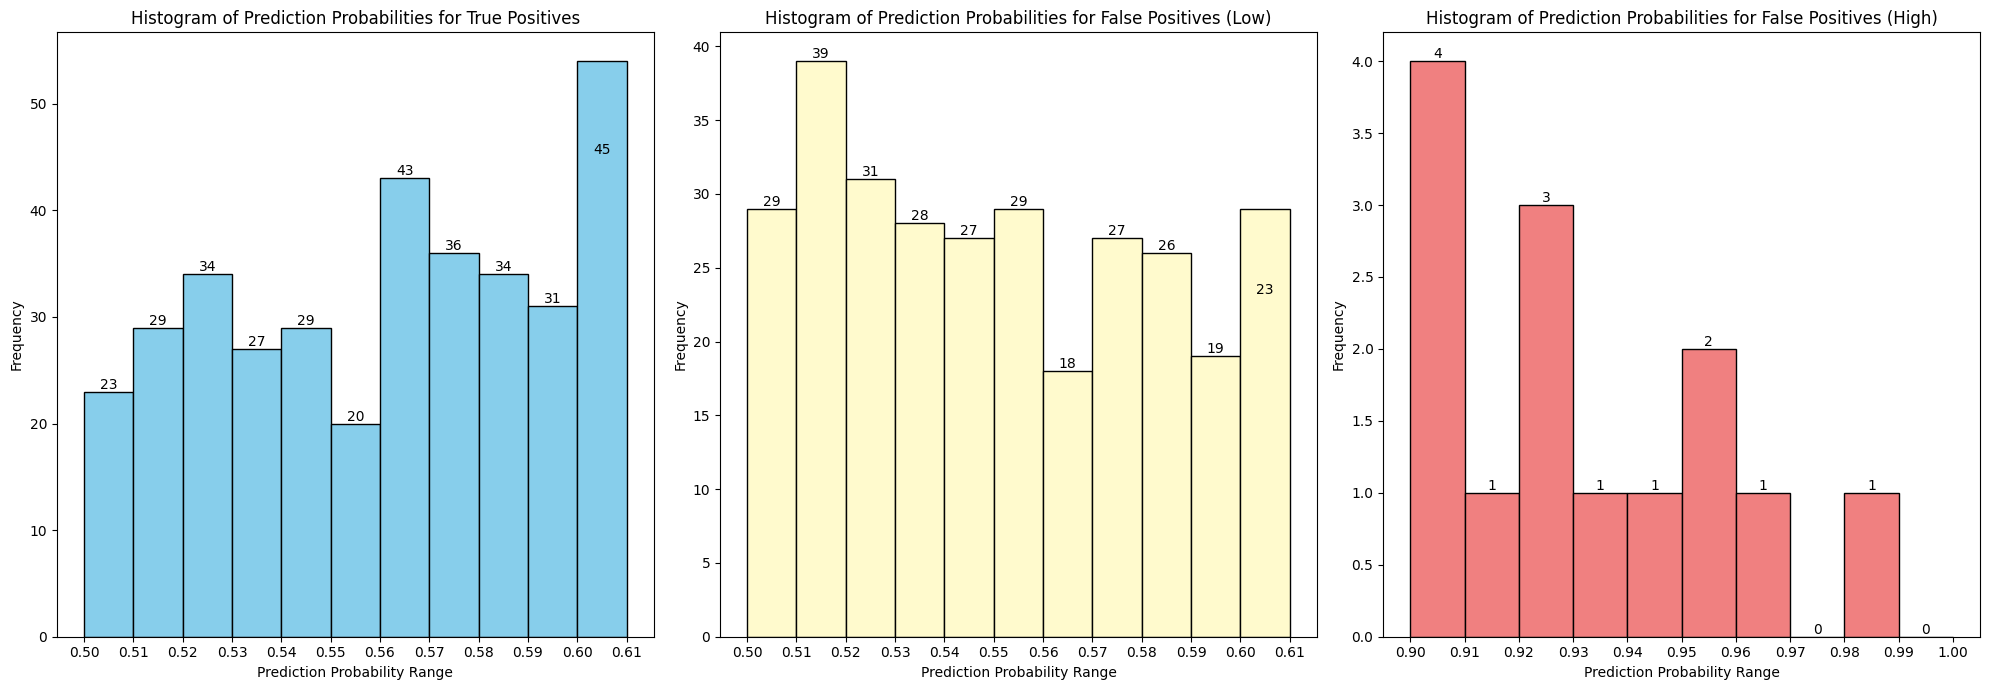

In [ ]:
# Define the bins for all classes
bins_tp_fp = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61]
bins_fp_high = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.00]

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

# Plot the histogram for True Positives
axs[0].hist(df_tp_rf['Prob_1'], bins=bins_tp_fp, edgecolor='black', label='RF True Positives', color='skyblue')
axs[0].set_xlabel('Prediction Probability Range')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Prediction Probabilities for True Positives')
axs[0].set_xticks(bins_tp_fp)

# Add frequency values on top of each bar for True Positives
for i in range(len(bins_tp_fp) - 1):
    count_tp_rf = df_tp_rf[(df_tp_rf['Prob_1'] >= bins_tp_fp[i]) & (df_tp_rf['Prob_1'] < bins_tp_fp[i+1])]['Prob_1'].count()
    axs[0].text((bins_tp_fp[i] + bins_tp_fp[i+1]) / 2, count_tp_rf, str(count_tp_rf), ha='center', va='bottom')

# Plot the histogram for False Positives (low probability)
axs[1].hist(df_fp_rf['Prob_1'], bins=bins_tp_fp, edgecolor='black', label='RF False Positives (Low)', color='lemonchiffon')
axs[1].set_xlabel('Prediction Probability Range')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Prediction Probabilities for False Positives (Low)')
axs[1].set_xticks(bins_tp_fp)

# Add frequency values on top of each bar for False Positives (low probability)
for i in range(len(bins_tp_fp) - 1):
    count_fp_rf = df_fp_rf[(df_fp_rf['Prob_1'] >= bins_tp_fp[i]) & (df_fp_rf['Prob_1'] < bins_tp_fp[i+1])]['Prob_1'].count()
    axs[1].text((bins_tp_fp[i] + bins_tp_fp[i+1]) / 2, count_fp_rf, str(count_fp_rf), ha='center', va='bottom')

# Plot the histogram for False Positives (high probability)
axs[2].hist(df_fp_rf['Prob_1'], bins=bins_fp_high, edgecolor='black', label='RF False Positives (High)', color='lightcoral')
axs[2].set_xlabel('Prediction Probability Range')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Prediction Probabilities for False Positives (High)')
axs[2].set_xticks(bins_fp_high)

# Add frequency values on top of each bar for False Positives (high probability)
for i in range(len(bins_fp_high) - 1):
    count_fp_rf = df_fp_rf[(df_fp_rf['Prob_1'] >= bins_fp_high[i]) & (df_fp_rf['Prob_1'] < bins_fp_high[i+1])]['Prob_1'].count()
    axs[2].text((bins_fp_high[i] + bins_fp_high[i+1]) / 2, count_fp_rf, str(count_fp_rf), ha='center', va='bottom')

plt.tight_layout()
plt.show()


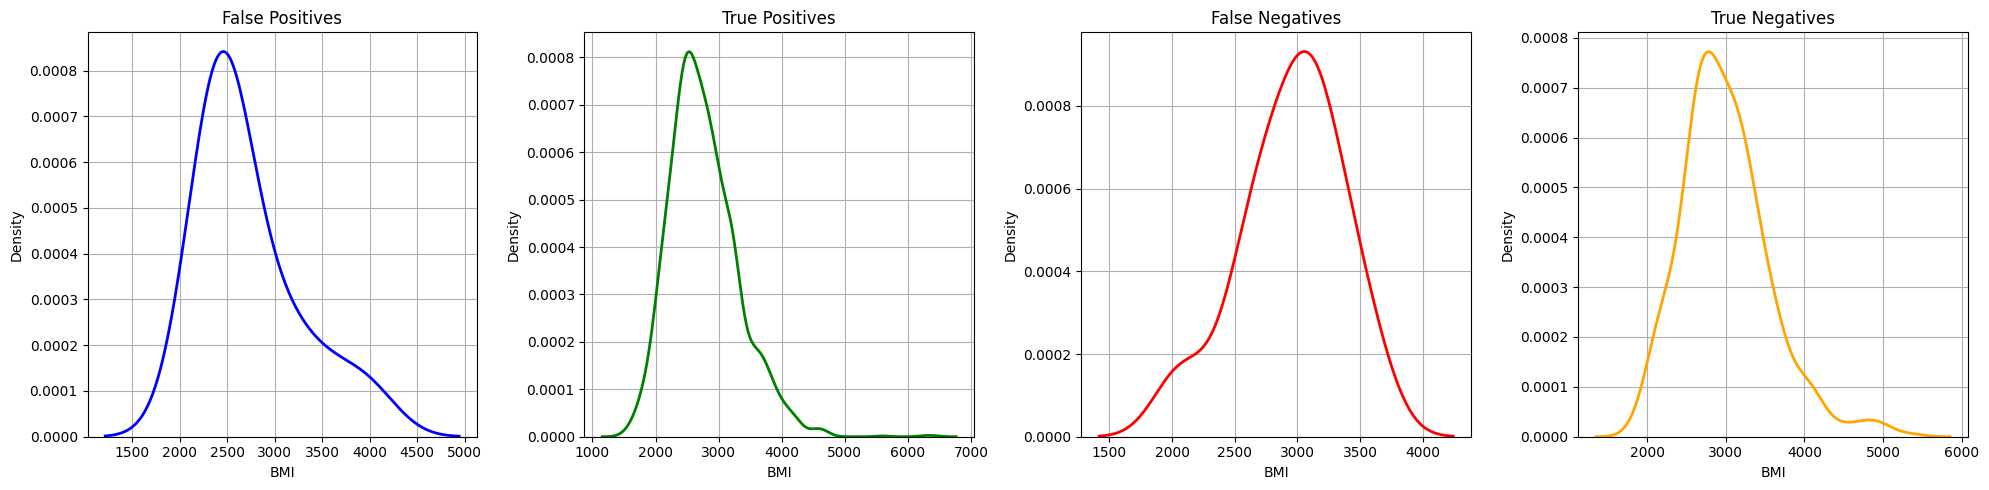

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for false positives, true positives, false negatives, and true negatives with Prob_1 > 0.90 for Random Forest
false_positives_high_prob_rf = X_test[X_test.index.isin(df_fp_rf[df_fp_rf['Prob_1'] > 0.90]['index_column'])]
true_positives_high_prob_rf = X_test[X_test.index.isin(df_tp_rf[df_tp_rf['Prob_1'] > 0.90]['index_column'])]
false_negatives_high_prob_rf = X_test[X_test.index.isin(df_fn_rf[df_fn_rf['Prob_0'] > 0.90]['index_column'])]
true_negatives_high_prob_rf = X_test[X_test.index.isin(df_tn_rf[df_tn_rf['Prob_0'] > 0.90]['index_column'])]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot the BMI distribution for false positives
sns.kdeplot(data=false_positives_high_prob_rf['BMI'], color='blue', linewidth=2, ax=axes[0])
axes[0].set_title('False Positives')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# Plot the BMI distribution for true positives
sns.kdeplot(data=true_positives_high_prob_rf['BMI'], color='green', linewidth=2, ax=axes[1])
axes[1].set_title('True Positives')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Density')
axes[1].grid(True)

# Plot the BMI distribution for false negatives
sns.kdeplot(data=false_negatives_high_prob_rf['BMI'], color='red', linewidth=2, ax=axes[2])
axes[2].set_title('False Negatives')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Density')
axes[2].grid(True)

# Plot the BMI distribution for true negatives
sns.kdeplot(data=true_negatives_high_prob_rf['BMI'], color='orange', linewidth=2, ax=axes[3])
axes[3].set_title('True Negatives')
axes[3].set_xlabel('BMI')
axes[3].set_ylabel('Density')
axes[3].grid(True)

plt.tight_layout()
plt.show()


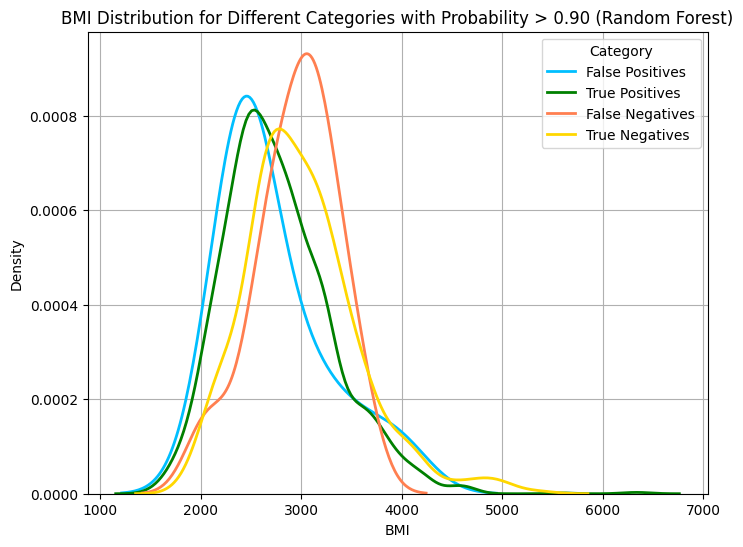

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
plt.figure(figsize=(8, 6))

# Plot the KDE distribution for false positives
sns.kdeplot(data=false_positives_high_prob_rf['BMI'], color='deepskyblue', linewidth=2, label='False Positives')

# Plot the KDE distribution for true positives
sns.kdeplot(data=true_positives_high_prob_rf['BMI'], color='green', linewidth=2, label='True Positives')

# Plot the KDE distribution for false negatives
sns.kdeplot(data=false_negatives_high_prob_rf['BMI'], color='coral', linewidth=2, label='False Negatives')

# Plot the KDE distribution for true negatives
sns.kdeplot(data=true_negatives_high_prob_rf['BMI'], color='gold', linewidth=2, label='True Negatives')

plt.title('BMI Distribution for Different Categories with Probability > 0.90 (Random Forest)')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.grid(True)
plt.legend(title='Category')
plt.show()


Misclassified records Analysis

In [ ]:
fp_analysis = X_test[X_test.index.isin(df_fp_rf['index_column'].values)]

In [ ]:
fn_analysis = X_test[X_test.index.isin(df_fn_rf['index_column'].values)]

In [ ]:
# write the misclassified records to a new Excel file
fp_analysis.to_excel("/content/drive/MyDrive/Capstone_Project/Backup/fp_analysis.xlsx", index=False, header = True)
fn_analysis.to_excel("/content/drive/MyDrive/Capstone_Project/Backup/fn_analysis.xlsx", index=False, header = True)